# Simulations of the semi-discrete prey-predator models

This notebook aims to be easily executable, by entring the parameters once for all, without disjunctions of cases, for each model. If we want to see other conditions, we only need to change the parameters at the top of the notebook.

In [82]:
#Import module
from models import *

In [83]:
#Set the parameters that will be used all along the code
r = 0.5
K = 10 
a = 3
c = 20
m = 0.1
gamma = 0.8
b = 5
q = 0.1

mu = 5
T = 0.1

t_0 = 0
t_n = 100

In [84]:
#Just to use the theorem for the squabbling model but not the corollary
y_star = (1/2) * ( mu*T - (m/q) + np.sqrt( (mu*T - (m/q))**2 + (4*mu*m*T) /( q*(1-np.exp(-m*T))) ) )

rhs = r*c*T*q/a
lhs = np.log(1 + (q/m)*(1-np.exp(-m*T)) *y_star)
print(f'{rhs =}')
print(f'{lhs =}')
lhs > rhs

rhs =0.03333333333333333
lhs =0.06587254798515224


True

In [85]:
#This cell is to eventually check if some stabilities conditions are satisfied. 
#If needed, the functions calculate_mu_a, calculate_mu_b and calculate_mu_q can be used

##No interference model
if mu > calculate_mu_a(r=r, K=K, a=a, c=c, m=m):
    print('GAS conditions for no interference model are satisfied')
else:
    print('GAS conditions for no interference model are NOT satisfied')

##BDA model
if r >= a/b:
    print('r needs to be increased to expect GAS')
else:
    if mu > calculate_mu_b(r=r, K=K, a=a, c=c, m=m, b=b, T=T): 
        print('GAS conditions for BDA are satisfied')  
    else:
        print('GAS conditions for BDA model are NOT satisfied')

##Squabbling model
if mu > calculate_mu_q(r=r, K=K, a=a, c=c, m=m, q=q):
    print('GAS conditions for squabbling are satisfied')
else:
    print('GAS conditions for squabbling are NOT satisfied')

GAS conditions for no interference model are satisfied
GAS conditions for BDA are satisfied
GAS conditions for squabbling are satisfied


Note: the squabbling model is complicated

In [86]:
#Other initial values but the periodic solution
x0_a = 1 
y0_a = y_star
x0y0_a = [x0_a, y0_a]

x0_f = 1.5
y0_f = 2
x0y0_f = [x0_f, y0_f]

x0_i = 2
y0_i = 1
x0y0_i = [x0_i, y0_i]

## 1. Model without interference

Other initial values but the periodic solution

In [87]:
xy_a = solve_no_int_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]


xy_f = solve_no_int_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_f = xy_f[0]
y_f = xy_f[1]


xy_i = solve_no_int_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_i = xy_i[0]
y_i = xy_i[1]

#time points
t = xy_a[2]

Periodic solution

In [88]:
x_p = np.zeros_like(t)
y_p = y_p_no_int(t, r, K, a, c, m, gamma, mu, T)

Plot results

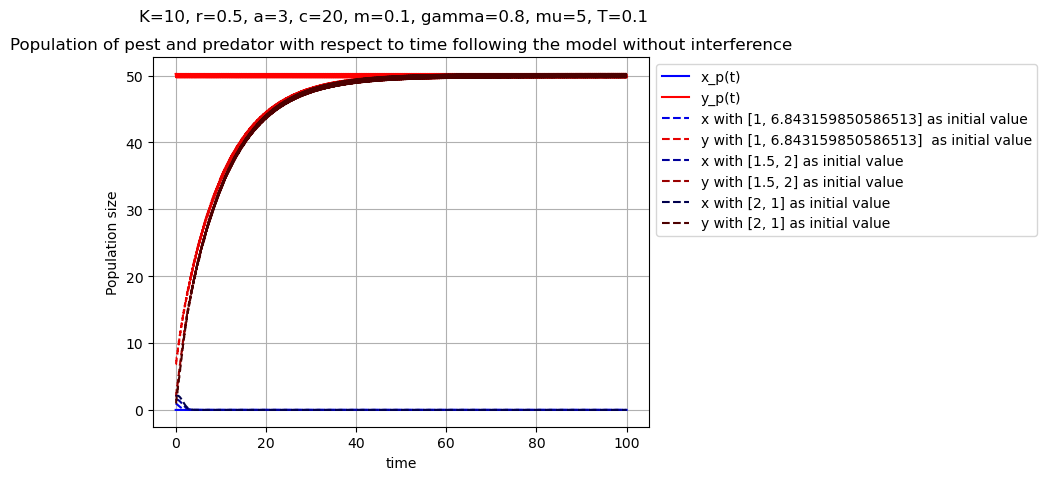

In [89]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a}  as initial value')
plt.plot(t, x_f, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_f} as initial value')
plt.plot(t, y_f, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_f} as initial value')
plt.plot(t, x_i, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_i} as initial value')
plt.plot(t, y_i, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_i} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the model without interference')
plt.suptitle(f'{K=}, {r=}, {a=}, {c=}, {m=}, {gamma=}, {mu=}, {T=}')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 2. Beddington-DeAngelis model

Other initial conditions but the periodic solution

In [90]:
xy_a = solve_bda_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]


xy_f = solve_bda_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_f = xy_f[0]
y_f = xy_f[1]


xy_i = solve_bda_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_i = xy_i[0]
y_i = xy_i[1]

#time points
t = xy_a[2]

Periodic solution

In [91]:
x_p = np.zeros_like(t)
y_p = y_p_bda(t, r, K, a, c, b, m, gamma, mu, T)

Plot results

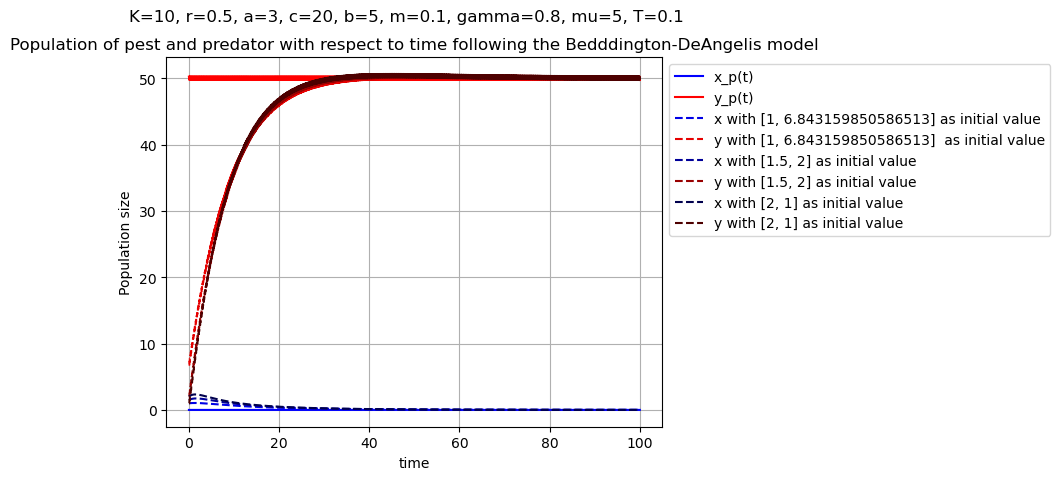

In [92]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a}  as initial value')
plt.plot(t, x_f, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_f} as initial value')
plt.plot(t, y_f, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_f} as initial value')
plt.plot(t, x_i, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_i} as initial value')
plt.plot(t, y_i, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_i} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the Bedddington-DeAngelis model')
plt.suptitle(f'{K=}, {r=}, {a=}, {c=}, {b=}, {m=}, {gamma=}, {mu=}, {T=}')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

## 3.Squabbling model

To be efficient, choose a small T

Initial conditions

In [93]:
xy_a = solve_s_ode(x0y0_a, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_a = xy_a[0]
y_a = xy_a[1]


xy_f = solve_s_ode(x0y0_f, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_f = xy_f[0]
y_f = xy_f[1]


xy_i = solve_s_ode(x0y0_i, r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T, t_0=t_0, t_n=t_n)
x_i = xy_i[0]
y_i = xy_i[1]

#time points
t = xy_a[2]

Periodic solution (we don't have the initial value, so we use its solution)

In [94]:
#The two different functions

x_p = np.zeros_like(t)
y_p = y_p_s(t=np.array(t), r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T)

#x_pp = np.zeros_like(t)
#y_pp = y_p_q(t=np.array(t), r=r, K=K, a=a, c=c, m=m, gamma=gamma, q=q, mu=mu, T=T)

In [95]:
#y_star_new = 4.8
#y_pp = (m * y_star_new * np.exp(-m * (np.array(t) % T))) / (m + (1 - np.exp(-m * (np.array(t) % T))) *q*y_star_new)

Plot results

In [96]:
#substraction_term = 2.5
#y_p_minus = y_p - substraction_term

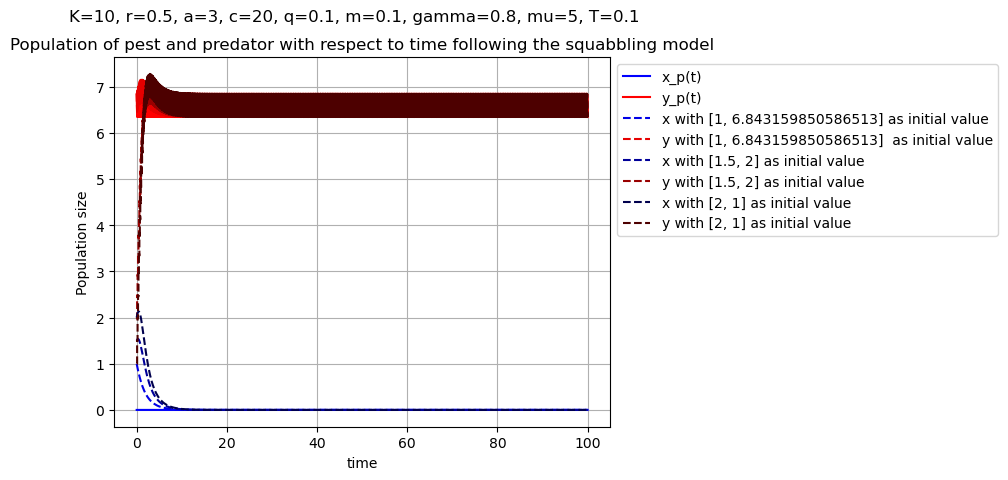

In [97]:
plt.plot(t, x_p, color = (0,0,1), label = 'x_p(t)')
plt.plot(t, y_p, color = (1,0,0), label = 'y_p(t)')
#plt.plot(t, x_pp, color = (0,0,1), label = 'x_p(t) with s')
#plt.plot(t, y_pp, color = (0,1,0), linestyle='--', label = f'theorical y_p with {y_star_new = }')
plt.plot(t, x_a, color = (0,0,0.9), linestyle='--', label=f'x with {x0y0_a} as initial value')
plt.plot(t, y_a, color = (0.9,0,0), linestyle='--', label=f'y with {x0y0_a}  as initial value')
plt.plot(t, x_f, color = (0,0,0.6), linestyle='--', label=f'x with {x0y0_f} as initial value')
plt.plot(t, y_f, color = (0.6,0,0), linestyle='--', label=f'y with {x0y0_f} as initial value')
plt.plot(t, x_i, color = (0,0,0.3), linestyle='--', label=f'x with {x0y0_i} as initial value')
plt.plot(t, y_i, color = (0.3,0,0), linestyle='--', label=f'y with {x0y0_i} as initial value')
#plt.plot(t, y_p_minus, linestyle='--', color = (1,1,0), label = f'y_p(t) - {substraction_term}')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title('Population of pest and predator with respect to time following the squabbling model')
plt.suptitle(f'{K=}, {r=}, {a=}, {c=}, {q=}, {m=}, {gamma=}, {mu=}, {T=}')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()